In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# load the source data for each panel 
stability_df = pd.read_excel('./figure_E5_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_a',index_col=0)
acc_df = pd.read_excel('./figure_E5_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_b',index_col=0)

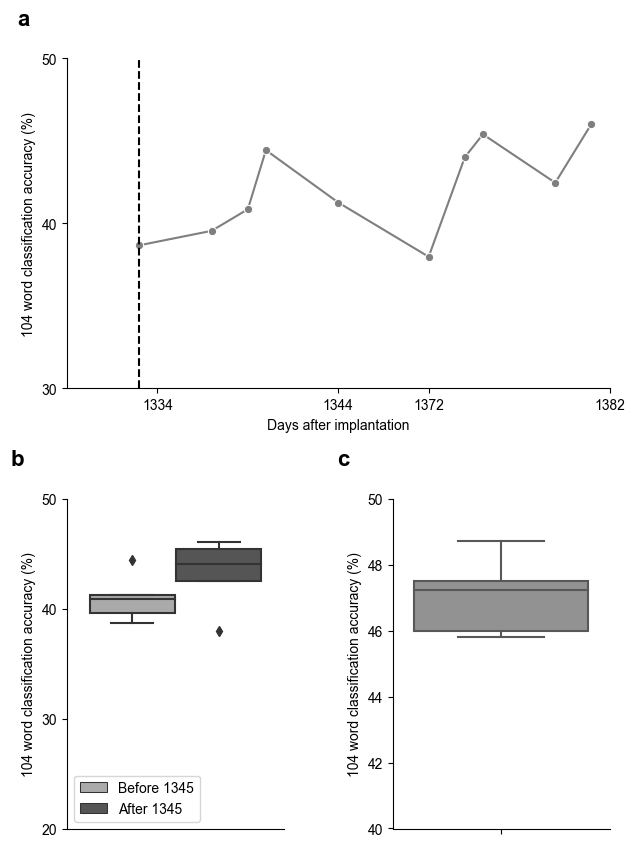

In [8]:
# Computes and plots the dendrogram
import seaborn as sns
import matplotlib.font_manager
import matplotlib as mpl
from gimutil.visualization import plotting_tools
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
import numpy as np
import pickle
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams.update({'font.size': 10})#, 'font.sans-serif': 'Arial'})
# Specifies plot parameters
rows = {
    'top_start' : 0,
    'top_stop'  : 300,
    
    'bot_start': 400,
    'bot_stop' : 700,
    'total' : 700
}

cols = {
    'stability_start' : 0,
    'stability_stop'  : 500,
    'stabbox_start' : 0,
    'stabbox_stop'  : 200,
    'overall_start' : 300,
    'overall_stop'  : 500,
    'total'      : 500
}
all_panel_params = {
    'stability' : {'row_and_col_spec' : ('top', 'stability')},
   'stabbox' : {'row_and_col_spec' : ('bot', 'stabbox')},
    'overall' : {'row_and_col_spec' : ('bot', 'overall')}
}



hex_col = sns.color_palette("deep", as_cmap=True)
#colors = ['#3f84e5','#b20d30','#c17817','#3f784c','#3f84e5']
colors = ['#b20d30','#c17817','#3f84e5','#3f784c']

# Creates the plot
fig, axs = plotting_tools.setup_figure(
    all_panel_params=all_panel_params, row_specs=rows, col_specs=cols,
    figsize=(7,10) #15,12
)

ax = axs['stability']
first_day = 1333
offset = 23
sns.lineplot(
    data=stability_df,
    x="Day", y='Accuracy', hue = 'Language', style= 'Language',
    markers=True, dashes=True,ax=ax,palette='binary'
)
ax.get_legend().remove()
ax.set_ylabel('104 word classification accuracy (%)')
ax.set_xlabel('Days after implantation')
ax.axvline(first_day,color='k',linestyle='--')
ax.set_xlim([first_day-4,np.max(stability_df.Day)+1])
ax.set_xticks([first_day+1,first_day+11,first_day+16,first_day+26])
ax.set_xticklabels([first_day+1,first_day+11,first_day+offset+16,first_day+offset+26])
ax.set_ylim([30,50])
ax.set_yticks([30,40,50])


ax.text(-0.07, 1.15, 'a', transform=ax.transAxes,
    va='top', ha='right', fontsize=16, fontweight='bold')

ax = axs['stabbox']

sns.boxplot(ax=ax,data=stability_df,x='Language',y='Accuracy',hue='before_1250',
            hue_order=['Before 1345','After 1345'],
            palette='binary')
ax.legend().set_title('')
#ax.legend(['Before 1251','After 1251'])
ax.set_ylim([20,50])
ax.set_yticks([20,30,40,50])
ax.set_ylabel('104 word classification accuracy (%)')
ax.set_xlabel('')
ax.set_xticks([])
ax.text(-0.2, 1.15, 'b', transform=ax.transAxes,
    va='top', ha='right', fontsize=16, fontweight='bold')
ax = axs['overall']
import pickle
sns.boxplot(ax=ax,y=acc_df['both']*100,color=sns.color_palette('binary')[2])
ax.set_ylim([40,50])
ax.set_ylabel('104 word classification accuracy (%)')
ax.text(-0.2, 1.15, 'c', transform=ax.transAxes,
    va='top', ha='right', fontsize=16, fontweight='bold')

ax.set_xlabel('')
plt.savefig('./figure_E5.jpg',dpi=300)
plt.show()
